# **Title :** **Heart Disease Pridiction**

`Auther Name` : __Muhammad Irfan__\
`Email` : irfan.datalytics@gmail.com\
`Github` : https://github.com/irfan5006\ \
`Linkedln` :https://www.linkedin.com/in/muhammad-irfan-a15359247

`Date` : 17-Jan-2024\
`Dateset` : [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age `(Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp chest pain type` 
    1. Typical angina  ( Substernal chest pain precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin ) .
    2. Atypical angina ( When one experiences chest pain that `doesn't meet` the `criteria for angina`, it's known as atypical chest pain ).
    3. Non-anginal ( pain a person` without heart disease` may feel behind the breast bone ).
    4. Asymptomatic ( Asymptomatic means `there are no symptoms` ).
* `trestbps resting blood pressure` (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg `(resting electrocardiographic results)
* `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute
  
#### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
  
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
 
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objective:
We will fill this section after doing some Exploratory Data Analysis`(EDA).`

### Import Libraries 
Let's start the Project by importing all the libraries that we will need in this project.

In [11]:
# Import Libraries 

# To Handle The data
import pandas as pd
import numpy as np

# To Visualise the data 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To Preprocess the Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

# Import iterative Imputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine Learning 
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split  ,cross_val_score , GridSearchCV

# Import the necessary libraries for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Matrics For Classification tasks
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error,r2_score , mean_absolute_error

# Ignore warning 
import warnings
warnings.filterwarnings('ignore')

### Load The Dataset

In [12]:
df =  pd.read_csv('E:\\Data_Sacience\\101-ML_Course\\Projects\Heart_Disease_Prediction\\heart_disease_uci.csv')

# Print First Five rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

### Explore Each Column

In [13]:
# Exploring the datastype of Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [14]:
# Data Shape 
df.shape

# Print the shape of the data
print(f'Rows : {df.shape[0]} \nColumns : {df.shape[1]}')

Rows : 920 
Columns : 16


In [15]:
# Id Column Check mini and max value 
df['id'].min(), df['id'].max()

# Print the Mini and Max Values using f string
print(f'Minimum ID : {df["id"].min()} \nMaximum ID : {df["id"].max()}')

Minimum ID : 1 
Maximum ID : 920


In [16]:
# Age Column Check mini and maxi value
df['age'].min(), df['age'].max()

# Print The Results Using F string 
print(f'Minimum age  : {df["age"].min()} \nMaximum age  : {df["age"].max()}')

Minimum age  : 28 
Maximum age  : 77


#### **Output:**
1. The `Minimum` age to have a heart disease starts from `28` years old.
2. The `Maximum` age to have a heart disease `77` years old.

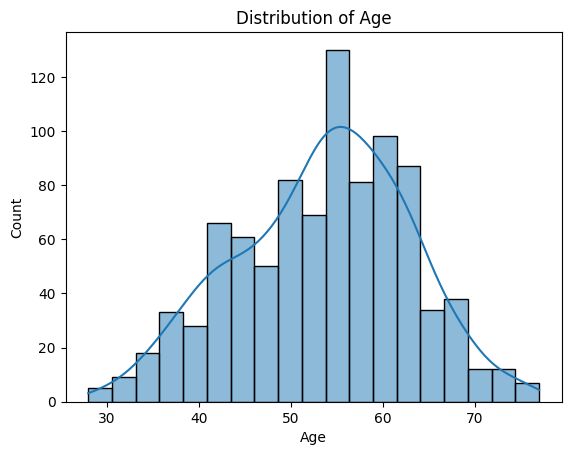

In [17]:
# Plot a Histogram to see the distribution of Age Column
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

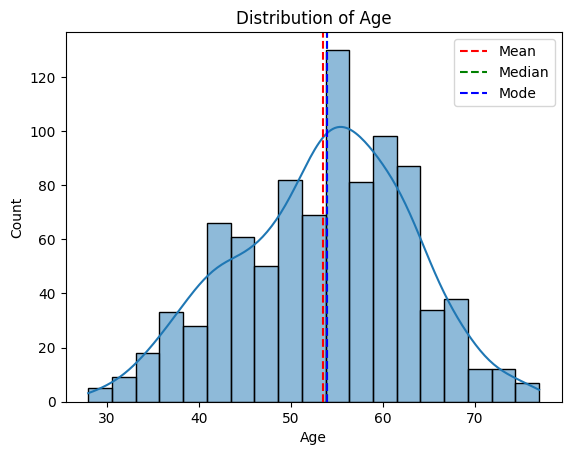

Mean Age : 53.51086956521739 
Median Age : 54.0 
Mode Age : 54


In [18]:
# Plot The Mean, Median, and Mode of age Column using sns and Coloring

# Calculate the mean, median, and mode of the age column
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]

# Plot the histogram with mean, median, and mode
sns.histplot(df['age'], kde=True)
plt.axvline(mean_age, color='red', linestyle='--', label='Mean')
plt.axvline(median_age, color='green', linestyle='--', label='Median')
plt.axvline(mode_age, color='blue', linestyle='--', label='Mode')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

# Print the Mean ,Median And Mode 
print(f'Mean Age : {mean_age} \nMedian Age : {median_age} \nMode Age : {mode_age}')

In [19]:
# Plot the Histogram using plotly and coloring this by sex
fig = px.histogram(df, x='age', color='sex', nbins=30)
fig.update_layout(title='Distribution of Age by Gender', xaxis_title='Age', yaxis_title='Count', legend_title='Gender')
fig.show()

In [20]:
# count the values Male and Female Individual
male_count = df[df['sex'] == 'Male'].shape[0]
female_count = df[df['sex'] == 'Female'].shape[0]

# Calculate PErcenatge 
male_percentage = (male_count / (male_count + female_count)) * 100
female_percentage = (female_count / (male_count + female_count)) * 100

# Print the Result using f string
print(f'Percentage of Male in the data : {male_percentage:.2f} % \nPercentage of Female in the data: {female_percentage:.2f} %')

# calculate Difference between male and female percentage
diff_percentage = ((male_count - female_count) / female_count) * 100

# Print the Result using f string
print(f"Male are {diff_percentage:.2f}% moe than Females in the data." )


Percentage of Male in the data : 78.91 % 
Percentage of Female in the data: 21.09 %
Male are 274.23% moe than Females in the data.


In [21]:
# Find Values counts of sex 
df['sex'].value_counts()

# Print the value counts
print(df['sex'].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64


In [22]:
# Find the value count of age column by sex column
age_count_by_sex = df.groupby('sex')['age'].value_counts()
print(age_count_by_sex)

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64


In [23]:
# Lets deal with Dataset column
# find the unique Value of the dataset
datset_unique_value = df['dataset'].unique()
# Display the Result in f string
print(f'Unique Values of dataset : {datset_unique_value}')
print('-------------------------------------------------')

# Calculate the value count of the dataset
dataset_value_count = df['dataset'].value_counts()
print(dataset_value_count)



Unique Values of dataset : ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
-------------------------------------------------
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


In [24]:
# Countplot of datset column using plotly

fig = px.bar(df, x='dataset' ,color='sex')
fig.update_layout(title='Dataset by Gender', xaxis_title='Dataset', yaxis_title='Count', legend_title='Gender')
fig.show()

# Print the value count of dataset column grouped by sex 

print(df.groupby('dataset')['sex'].value_counts())
print('-------------------------------------------------')

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64
-------------------------------------------------


In [25]:
# Plot of age column using plotly and coloring by dataset coloum
fig = px.histogram(df, x='age',  color='dataset')
fig.update_layout(title='Distribution of Age by Dataset', xaxis_title='Age', yaxis_title='Count', legend_title='Dataset')
fig.show()

# Print the mean , median and mode groupby dataset column based on age column using f string
# Separte line 
print(f"Mean Age Of Dataset: \n{df.groupby('dataset')['age'].mean()} ")
print('--------------------------------------------------------------------')
print(f"\nMedian Age of Dataset: \n{df.groupby('dataset')['age'].median()} ")
print('--------------------------------------------------------------------')
print (f"\nMode Age of Dataset: \n{df.groupby('dataset')['age'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)}")


Mean Age Of Dataset: 
dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64 
--------------------------------------------------------------------

Median Age of Dataset: 
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64 
--------------------------------------------------------------------

Mode Age of Dataset: 
dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


#### Let's Explore The CP (Chest Pain) Column:

In [26]:
# Value count of cp coulumn 
cp_value_count = df['cp'].value_counts()
print(cp_value_count)
print('----------------------------------------------------')

# Countplot of cp column using plotly

fig = px.histogram(df, x='age', color='cp')
fig.update_layout(title='Distribution of Age by Chest Pain Type', xaxis_title='Age', yaxis_title='Count', legend_title='Chest Pain Type')
fig.show()



cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
----------------------------------------------------


<Axes: title={'center': 'Countplot of Chest Pain Type by Dataset'}, xlabel='Chest Pain Type', ylabel='Count'>

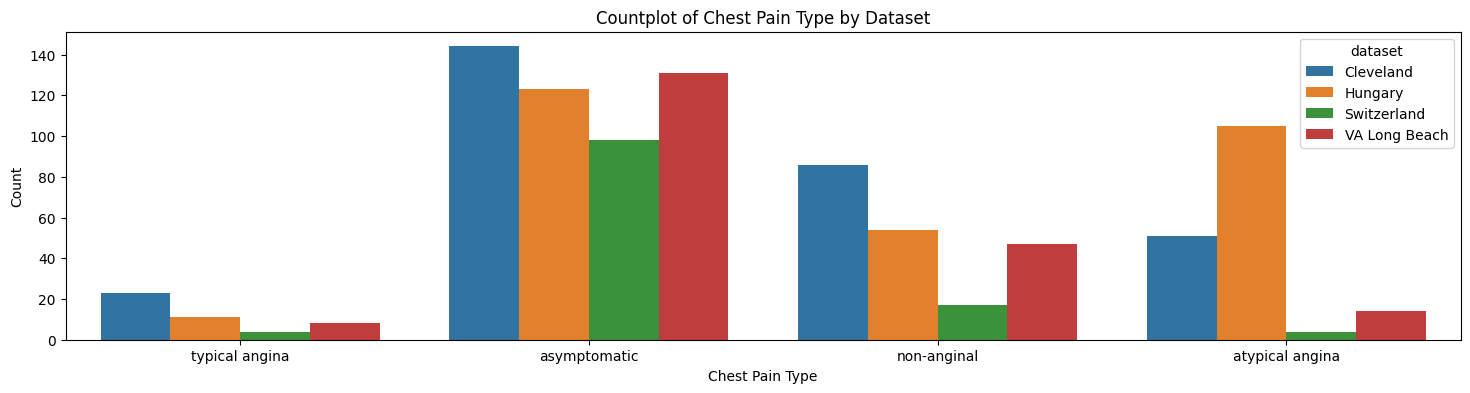

In [27]:
# Plot the countplot cp column based on datset
plt.figure(figsize=(18,4))
countplot_cp = sns.countplot(df, x='cp' , hue='dataset')
# Add title and labels to the plot
countplot_cp.set_title('Countplot of Chest Pain Type by Dataset')
countplot_cp.set_xlabel('Chest Pain Type')
countplot_cp.set_ylabel('Count')
countplot_cp

In [28]:
# Groupby this with dataset column
typical_angina_count_by_dataset = df.groupby('dataset')['cp'].value_counts()

# Print the Result using f string

print(typical_angina_count_by_dataset)
print('----------------------------------------------------')

dataset        cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: count, dtype: int64
----------------------------------------------------


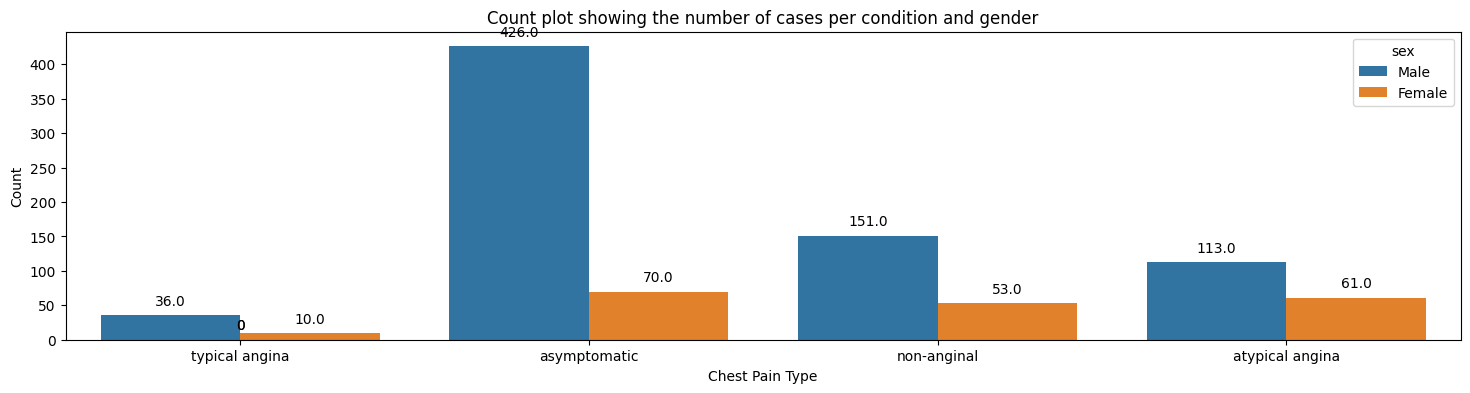

In [29]:
plt.figure(figsize=(18, 4))

# Using Seaborn's countplot to display counts on top of bars
countplot_sex = sns.countplot(data=df, x='cp', hue='sex')
plt.title('Count plot showing the number of cases per condition and gender')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')


# Adding count values on top of the bars using text annotations
for p in countplot_sex.patches:
    countplot_sex.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


#### Let's Explore the trestbps (resting blood pressure ) Column:

The Normal Resting Blood Pressure is **`120/80 mm Hg`**.

**Write here , What will happen when if the blood pressure is High or Low and then you can bin the data based on those values.**

In [30]:
# Find the summery of trestbps column
trestbps_summery = df['trestbps'].describe()
trestbps_summery


count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

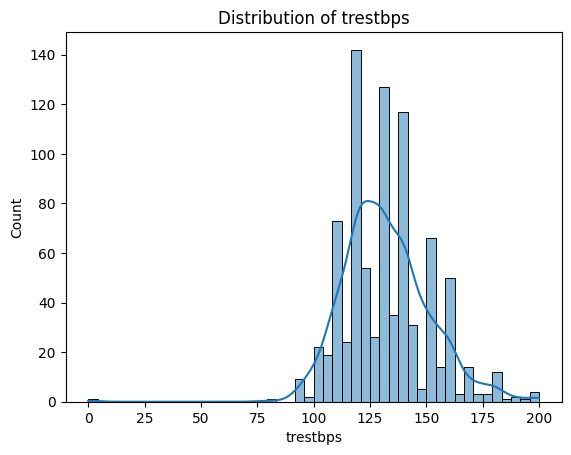

In [31]:
# plot histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)
plt.title('Distribution of trestbps')
plt.xlabel('trestbps')
plt.ylabel('Count')
plt.show()

In [32]:
# Find the Missing Values in trestbps columns and Than Deal 
# Perectnage of Trestbps column of missing values 

trestbps_missingvalue_perectange = df['trestbps'].isnull().sum() / df.shape[0] * 100

# Print the Result by f string
print(f'Percentage of Missing Values in trestbps column : {trestbps_missingvalue_perectange:.2f} %')
print("-----------------------------------------------------------")


# Impute the Missing values of trestbps column using iterative imputer 

imputer1 = IterativeImputer(max_iter=10, random_state=42)
imputer1 = imputer1.fit(df[['trestbps']])
df['trestbps'] = imputer1.transform(df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing Values in trestbps column: {df['trestbps'].isnull().sum()}")


Percentage of Missing Values in trestbps column : 6.41 %
-----------------------------------------------------------
Missing Values in trestbps column: 0


In [33]:
# Impute Missing Values using iterative for ca, oldpeak,thalch and chol columns
# Create an Object for Iterative imputer 
imputer_ca = IterativeImputer(max_iter=10, random_state=42)
imputer_oldpeak = IterativeImputer(max_iter=10 , random_state=42)
imputer_thalch = IterativeImputer(max_iter=10, random_state=42)
imputer_chol = IterativeImputer(max_iter=10, random_state=42)

# Fit_transform the imputer on above column
df['ca'] = imputer_ca.fit_transform(df[['ca']])
df['oldpeak'] = imputer_oldpeak.fit_transform(df[['oldpeak']])
df['thalch'] = imputer_thalch.fit_transform(df[['thalch']])
df['chol'] = imputer_chol.fit_transform(df[['chol']])

In [34]:
# Let's impute other Column with missing values 
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64


 <span style="color: Skyblue; font-size: 250%; font-weight: bold;">Let's Impute the Missing values of  Object Datatypes Columns</span>

In [35]:
print(f"The Missing values in the thal column are: {df['thal'].isnull().sum()}")

The Missing values in the thal column are: 486


#### Let's Seperate the Each column based on Data-Type to Impute the Missing Values.

In [36]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
# Print The missing data using f string
print(f'The missing data is : \n{missing_data}')
print('-------------------------------------------------------------------------------')

# Store the Missing columns in object 
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

The missing data is : 
thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64
-------------------------------------------------------------------------------


['fbs', 'restecg', 'exang', 'slope', 'thal']

In [37]:
# Store The Columns based on data-type in seprate object
cat_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
num_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

### **Let's Make a Automate Function for Categorical and Object Datatype column to impute Missing Values .**

In [38]:
# define the function to impute the missing values in thal column
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


   

### **Let's Make a Automate Function for Numeric  Datatype column to impute Missing Values .**

In [39]:
def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


In [40]:
# Use the function to impute missing values
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in cat_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in num_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.85 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 80.35 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 65.04 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



---

 <span style="color: Skyblue; font-size: 250%; font-weight: bold;">Let's Deal with Outliers :</span>
 
 ---

In [41]:
# Lets Show Data in Dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


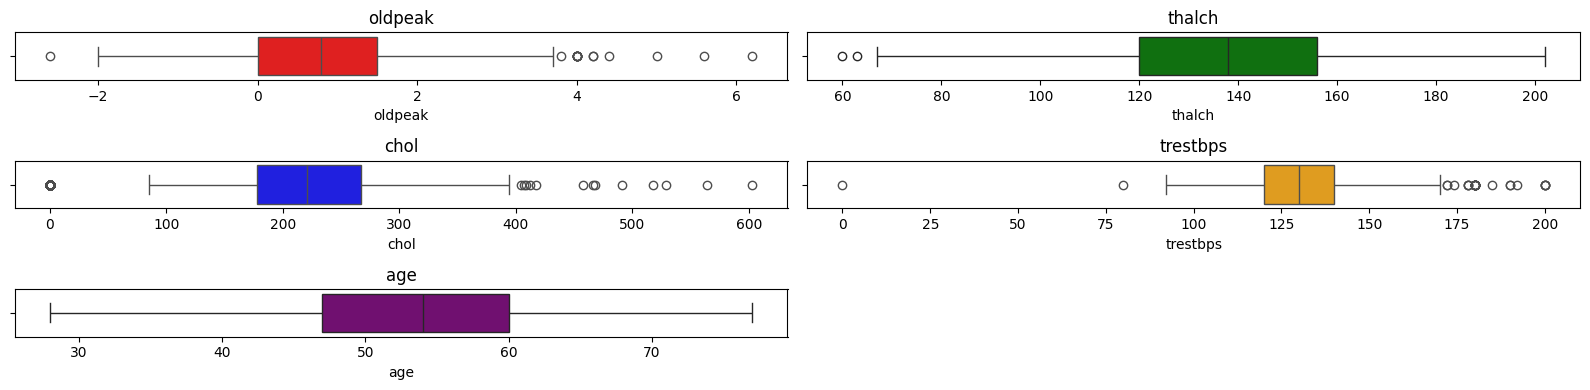

In [42]:

colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.figure(figsize=(16, 4))

# Assuming num_cols is a list of numeric column names in your DataFrame
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])  # Use colors[i] instead of colors
    plt.title(col)

plt.tight_layout()
plt.show()


In [43]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame and num_cols is a list of numeric column names
# If you haven't imported the data, replace this with your actual data import code

colors = ['red', 'green', 'blue', 'orange', 'purple']

fig = px.box(df, y=num_cols, color_discrete_sequence=colors, labels={'variable': 'Column'})
fig.update_layout(height=400, width=1000, title_text="Boxplots for Numeric Columns")
fig.show()


In [44]:
# Print The Row from df where trestbps value is 0
# Assuming df is your DataFrame
df[df['trestbps']==0]

# remove this row from data using drop function
df = df.drop(df[df['trestbps']==0].index)


---

 <span style="color: orange; font-size: 250%; font-weight: bold;">Let's Work on Machine Learning :</span>
 
 ---

In [45]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [46]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. The Unique valus in this column are: [0,1,2,3,4] which states that there are 5 types of heart diseases.

* **0 = no heart disease**
* **1 = mild heart disease**
* **2 = moderate heart disease**
* **3 = severe heart disease**
* **4 = critical heart disease**

In [47]:
# Split the Data into X and y
X = df.drop('num', axis=1)
y = df['num']

# Encode the data using seperate label encoder for all categorical columns and save it for inverse transform
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass    
# Split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Enlist All the models that you will use to predict the heart disease. These models should be classifier for multi-class Classification.

* **Logestic regression**
* **KNN**
* **NB**
* **Decision Tree**
* **Random Forest**
* **XGboost**
* **Adabosst**
* **GradientBoostingClassifier**
* **LightGBM**

In [48]:
# Import all models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import pipeline

# Import metrics 
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


In [49]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())

]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        ('model', models)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
     # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

TypeError: 'module' object is not callable

#### **Output:**
1. The Most of People get Heart Disease Involve at the Age of Range **`53-54`** years.
2. Most Of the Males and females get are with heart disease at the age of **`54-55`** years.
3. Percentage of Male in the data : **`78.91 %`** 
4. Percentage of Female in the data: **`21.09 %`**
5. Males are `274.23%` more than Females in the data. **`274.23%`** it Means that **`2.74x`** Increase Males rather than Females.
6. We have  highest number of People From **`Cleveland 304`** and Lowest From **`Switzerland 123`**.\
    1.The highest number of Females From **`Cleveland 97`** and Lowest From **`Switzerland 6`**.
    2.The highest number of Males From **`Hungary 212`** and Lowest From **`Switzerland 113`**.
    
7. `The Obervations here About Mean , Median and Mode of Age Column, Grouped by dataset column.`\
    1.The Value Of **`Mean`** Differnet each of Country WHere the data is collected.\
    2.The Value Of **`Median`** Differnet each of Country WHere the data is collected.\
    3.The Value Of **`Mode`** Differnet each of Country WHere the data is collected.


8. `The Observation Cp (Chest Pain) Column.`
   1. The Highest People have **`asymptomatic 496`** and Lowest People have **`typical angina 46`**.
   2. The People Have Higest **`Typical angina 23`** found in **`Cleveland`** and lowest in **`Swizerland`** which is `4`.
   3. The **`36 typical angina`** found in Males and **`10`** in **`Females`**.

9. **`Steps of Imputing missing-values and why did Me Choice those Steps.`**
   1. import Libraries 
   2. Load the data
   3.  Find the Column with Missing values and store in an object
   4. Find the columns based on data-type\
      1.Numeric\
      2.Categorical\
      3.Boolean
   5.  Define the Fucntion to impute missing values 
   6.  Apply the Function to our dataset with Missing Values
   7.  Check the missing values after Imputation
10. I think its Easy when we Define function we apply we want to impute column. it save our time .  when ever we deal with large dataset and missing percentage high we use `esemble family model` to reduce baisness and we will get` high accuracy`.  